<a href="https://colab.research.google.com/github/khadijaatiq/ML-Algos/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Import required libraries [cite: 11]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Read the data [cite: 12]
# Replace 'filename.csv' with the actual file provided in the exam
data = pd.read_csv("Wholesale customers data.csv")

# 3. Inspect the data [cite: 12]
print(data.head())
print(data.describe())
# Note: Look at the mean and std. If variables have huge differences
# (e.g., one is 1000s, another is 1s), you MUST scale them[cite: 13, 14, 15].

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.5000

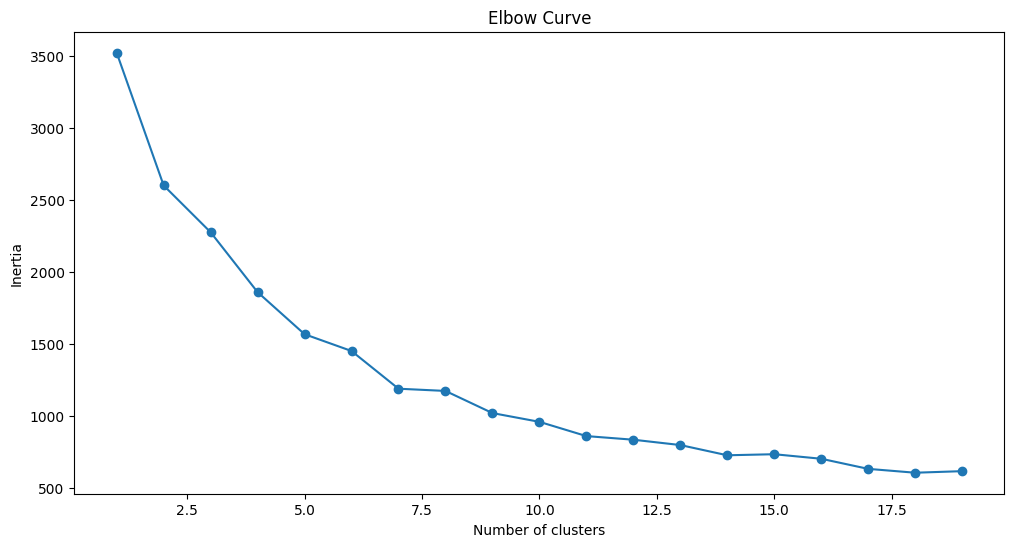

cluster
1    212
2    126
0     91
4     10
3      1
Name: count, dtype: int64


In [3]:
# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

# Optional: Check stats of scaled data to confirm they are similar
pd.DataFrame(data_scaled).describe()
# Create an empty list to store Inertia (SSE) values
SSE = []

# Loop through a range of clusters (e.g., 1 to 20)
for cluster in range(1, 20):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=cluster, init='k-means++')

    # Fit the algorithm on scaled data
    kmeans.fit(data_scaled)

    # Append the inertia value to the list
    SSE.append(kmeans.inertia_)

# Plot the results (The Elbow Curve) [cite: 21]
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()
# Initialize KMeans with the chosen optimal number (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++')

# Fit the final model
kmeans.fit(data_scaled)

# Predict the cluster labels for the data
pred = kmeans.predict(data_scaled)
# Create a dataframe from the data
frame = pd.DataFrame(data_scaled)

# Add a new column for the cluster labels
frame['cluster'] = pred

# Count how many data points are in each cluster
print(frame['cluster'].value_counts())